# Reading data and preprocessing for the analysis

### Import the necessary libraries and introduction to dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('data/genshin.csv')
data.head()

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,...,hp_1_20,atk_1_20,def_1_20,spsecial_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,...,1030,20,68,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,...,1039,24,60,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%
2,Amber,4,Mondstadt,Pyro,NaN,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,...,793,19,50,0.0%,0.0%,6.0%,12.0%,12.0%,18.0%,24.0%
3,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,Tall Male,Taurus Iracundus,01-Jun,Way of the Strong,...,1001,18,75,0.0%,0.0%,4.8%,9.6%,9.6%,14.4%,19.2%
4,Baizhu,5,Liyue,Dendro,NaN,Catalyst,Tall Male,Lagenaria,25-Apr,Heat-Quelling Soup,...,1039,14,38,0.0%,0.0%,7.2%,14.4%,14.4%,21.6%,28.8%


In [3]:
data.shape

(73, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   character_name       73 non-null     object
 1   rarity               73 non-null     int64 
 2   region               73 non-null     object
 3   vision               73 non-null     object
 4   arkhe                7 non-null      object
 5   weapon_type          73 non-null     object
 6   model                73 non-null     object
 7   constellation        73 non-null     object
 8   birthday             73 non-null     object
 9   special_dish         72 non-null     object
 10  affiliation          72 non-null     object
 11  release_date         73 non-null     object
 12  limited              73 non-null     bool  
 13  voice_eng            73 non-null     object
 14  voice_cn             73 non-null     object
 15  voice_jp             73 non-null     object
 16  voice_kr  

### Deletion of unnecessary data
Beforehand, I removed Aloy and Travelers from the dataset so as not to mess up the stats and only analyze characters you can get in-game for wishes.

For now, I drop all useless columns for feature analysis.


In [5]:
data = data[['character_name',
             'rarity',
             'region',
             'vision',
             'arkhe',
             'weapon_type',
             'model',
             'constellation',
             'birthday',
             'special_dish',
             'affiliation',
             'release_date',
             'ascension',
             'hp_90_90',
             'atk_90_90',
             'def_90_90',
             ]]

data.head()

,character_name,rarity,region,vision,arkhe,weapon_type,model,constellation,birthday,special_dish,affiliation,release_date,ascension,hp_90_90,atk_90_90,def_90_90
0,Albedo,5,Mondstadt,Geo,NaN,Sword,Medium Male,Princeps Cretaceus,13-Sep,Woodland Dream,Knights of Favonius,12/23/20,Geo DMG Bonus,13226,251,876
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,Tall Male,Vultur Volans,11-Feb,Ideal Circumstance,Sumeru Akademiya,01/18/23,Dendro DMG Bonus,13348,313,781
2,Amber,4,Mondstadt,Pyro,NaN,Bow,Medium Female,Lepus,10-Aug,Outrider's Champion Steak!,Knights of Favonius,09/28/20,ATK,9461,223,601
3,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,Tall Male,Taurus Iracundus,01-Jun,Way of the Strong,Arataki Gang,12/14/21,CRIT Rate,12858,227,959
4,Baizhu,5,Liyue,Dendro,NaN,Catalyst,Tall Male,Lagenaria,25-Apr,Heat-Quelling Soup,Bubu Pharmacy,05/02/23,HP,13348,192,499


### Choosing colors for plots and writing useful functions for future

In [6]:
rarity = {
    '5star': 'darkgoldenrod',
    '4star': 'mediumpurple',
}

element = {
    'Anemo': 'turquoise',
    'Cryo': 'powderblue',
    'Dendro': 'lightgreen',
    'Electro': 'rebeccapurple',
    'Geo': 'goldenrod',
    'Hydro': 'deepskyblue',
    'Pyro': 'orangered',
}

weapon = {
    'Bow': 'snow',
    'Catalyst': 'gainsboro',
    'Claymore': 'silver',
    'Polearm': 'darkgrey',
    'Sword': 'grey',
}


def vision_color(vision):
    return element[vision]


def rare_color(rare):
    return rarity[rare]


def weapon_color(type):
    return weapon[type]

# I. World of Teyvat. Visual analysis of characters
This part of analysis is used for primary analysis of dataset. I want to understand the relation between different categorical features of the dataset. Basically, I'm going to use a bar plot for this purpose.

## A. Which elements are more common among the characters?

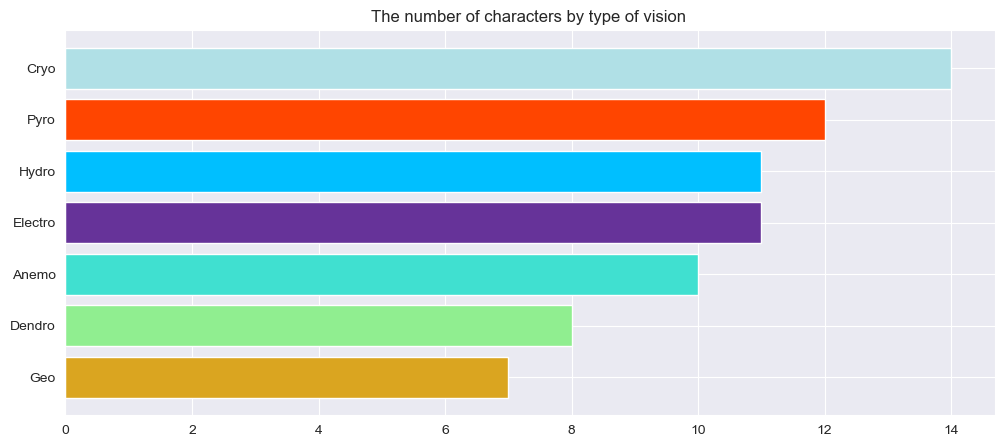

In [7]:
plot_data_vision = data.groupby(['vision']).count()['character_name'].reset_index().sort_values(by='character_name',
                                                                                                ascending=True)

plot_data_vision = plot_data_vision.rename(columns={
    'character_name': 'count',
})

plt.figure(figsize=(12, 5))
plt.barh(plot_data_vision['vision'], plot_data_vision['count'],
         color=[vision_color(i) for i in plot_data_vision['vision'].unique().tolist()])
plt.title('The number of characters by type of vision ')

plt.show()

According to the plot, we can see that the most popular vision is Cryo, Pyro, and Hydro with Electro. The least number of characters with Geo vision.

## B. What weapon type is most usable among the characters? 

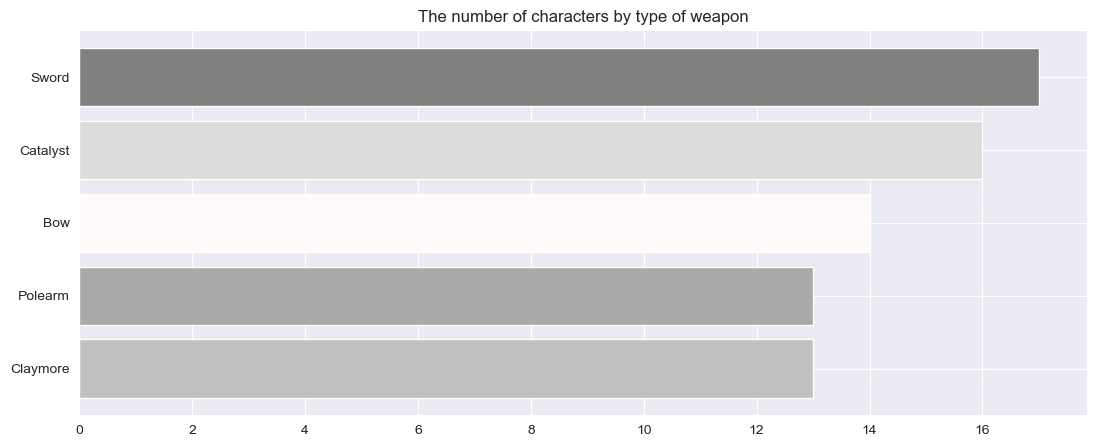

In [8]:
plot_data_weapon = data.groupby(['weapon_type']).count()['character_name'].reset_index().sort_values(
    by='character_name', ascending=True)
plot_data_weapon = plot_data_weapon.rename(columns={
    'character_name': 'count',
})

plt.figure(figsize=(13, 5))
plt.barh(plot_data_weapon['weapon_type'], plot_data_weapon['count'],
         color=[weapon_color(i) for i in plot_data_weapon['weapon_type'].unique().tolist()])
plt.title('The number of characters by type of weapon')

plt.show()

There we see that most of the characters use sword or catalyst weapon.

## C. Gender analysis

In this part, I want to analyze the impact of gender on statistics

### Which characters are there more: male or female?

In [9]:
# What types of models do the data have?
models = data['model'].unique().tolist()
models

['Medium Male', 'Tall Male', 'Medium Female', 'Tall Female', 'Short Female']

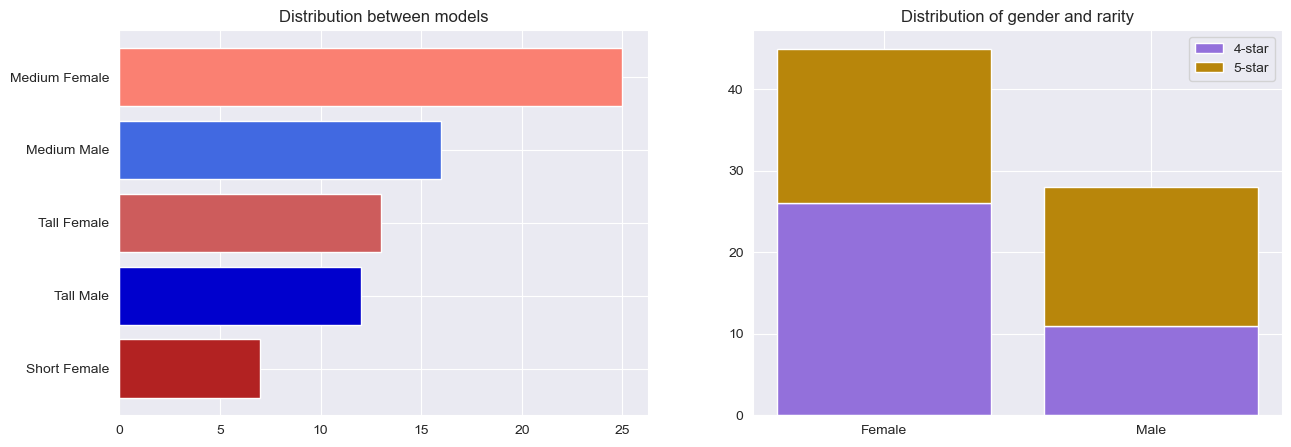

In [10]:
# Models
plt.figure(figsize=(15, 5))

data.loc[(data['model'] == 'Medium Female') | (data['model'] == 'Tall Female') | (
        data['model'] == 'Short Female'), 'gender'] = 'Female'

data.loc[(data['model'] == 'Medium Male') | (data['model'] == 'Tall Male'), 'gender'] = 'Male'

plt_data = data['model'].value_counts().reset_index().sort_values(by='count', ascending=True)
plt.subplot(121)
plt.barh(plt_data['model'], plt_data['count'], color=['firebrick', 'mediumblue', 'indianred', 'royalblue', 'salmon'])
plt.title('Distribution between models')

plt_data = pd.crosstab(data['gender'], data['rarity']).reset_index()

plt.subplot(122)
plt.bar(plt_data['gender'], plt_data[4], color=rarity['4star'])
plt.bar(plt_data['gender'], plt_data[5], bottom=plt_data[4], color=rarity['5star'])
plt.legend(['4-star', '5-star'])
plt.title('Distribution of gender and rarity')

plt.show()

A significant number of characters have a Medium Female type of model. If we sum all characters by gender, we can see that there are a lot more female characters than male. Also, I plot the ration of 4-star character to 5-star, distributed by gender. From this graphic, we can see that the number of 4-star characters is more than 5-star for female. However, most of the male characters are 5-star rarities.


### What is the distribution of gender by weapon and element?

For a more detailed visual analysis, I plot 2 graphs that demonstrate the relationship between gender, element and weapon.

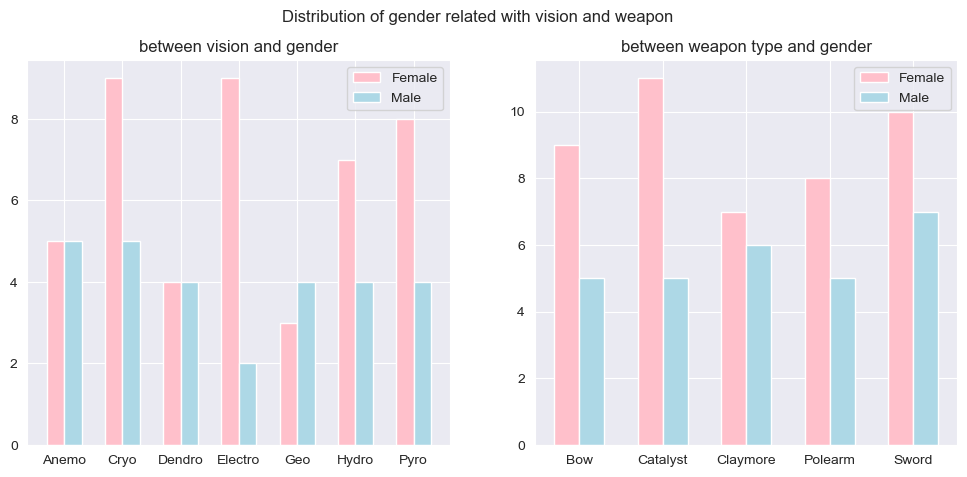

In [11]:
# Plot relation between gender and vision
plt_data_vision = data[['gender', 'vision']].value_counts().reset_index().sort_values(by=['vision'])

fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 2)

ax_vision = fig.add_subplot(gs[0, 0])
ax_weapon = fig.add_subplot(gs[0, 1])

width = 0.3
x_vision = np.arange(len(plt_data_vision['vision'].unique().tolist()))

fem_vision = ax_vision.bar(
    x_vision - width / 2,
    plt_data_vision[plt_data_vision['gender'] == 'Female']['count'],
    width,
    label='Female',
    color='pink',
)

male_vision = ax_vision.bar(
    x_vision + width / 2,
    plt_data_vision[plt_data_vision['gender'] == 'Male']['count'],
    width,
    label='Male',
    color='lightblue'
)

ax_vision.set_title('between vision and gender')
ax_vision.set_xticks(x_vision)
ax_vision.set_xticklabels(plt_data_vision['vision'].unique().tolist())
ax_vision.legend()

# Plot relation between gender and weapon type
plt_data_weapon = data[['gender', 'weapon_type']].value_counts().reset_index().sort_values(by=['weapon_type'])
x_weapon = np.arange(len(plt_data_weapon['weapon_type'].unique().tolist()))

fem_weapon = ax_weapon.bar(
    x_weapon - width / 2,
    plt_data_weapon[plt_data_weapon['gender'] == 'Female']['count'],
    width,
    label='Female',
    color='pink',
)

male_weapon = ax_weapon.bar(
    x_weapon + width / 2,
    plt_data_weapon[plt_data_weapon['gender'] == 'Male']['count'],
    width,
    label='Male',
    color='lightblue'
)

ax_weapon.set_title('between weapon type and gender')
ax_weapon.set_xticks(x_weapon)
ax_weapon.set_xticklabels(plt_data_weapon['weapon_type'].unique().tolist())
ax_weapon.legend()

plt.suptitle('Distribution of gender related with vision and weapon')
plt.show()

Using the plot on the left, we are able to notice that the number of female Cryo and Electro characters stands out in a big way. By the way, the number of Anemo and Dendro characters of each gender is equal. However, male Electro characters are very few even compared to male characters of other elements. 

The right plot, unfortunately, doesn't give us some interesting information. Basically, there are twice as many female characters per weapon type as male characters.

## D. Birthdate distribution

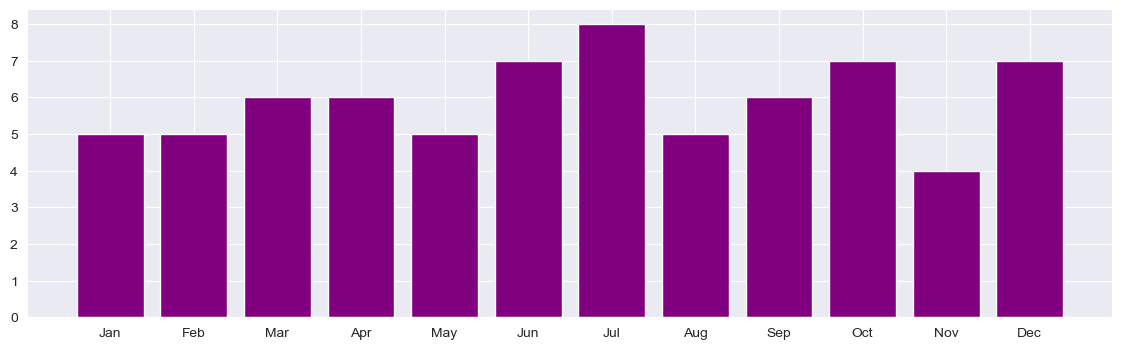

In [12]:
plt_data = data[['character_name', 'birthday']].reset_index()
count_by_month = {
    'Jan': 0,
    'Feb': 0,
    'Mar': 0,
    'Apr': 0,
    'May': 0,
    'Jun': 0,
    'Jul': 0,
    'Aug': 0,
    'Sep': 0,
    'Oct': 0,
    'Nov': 0,
    'Dec': 0,
}

for date in plt_data['birthday'].unique().tolist():
    count_by_month[date[3::]] += 1

plt.figure(figsize=(14, 4))
plt.bar(count_by_month.keys(), count_by_month.values(), color='purple')
plt.show()

According to plot, we can notice that the developers try to distribute the birthday evenly among the months. Interesting that most of the characters were born in July (8 characters), and the smallest number of them were born in November (4 characters).

## E. Region distribution

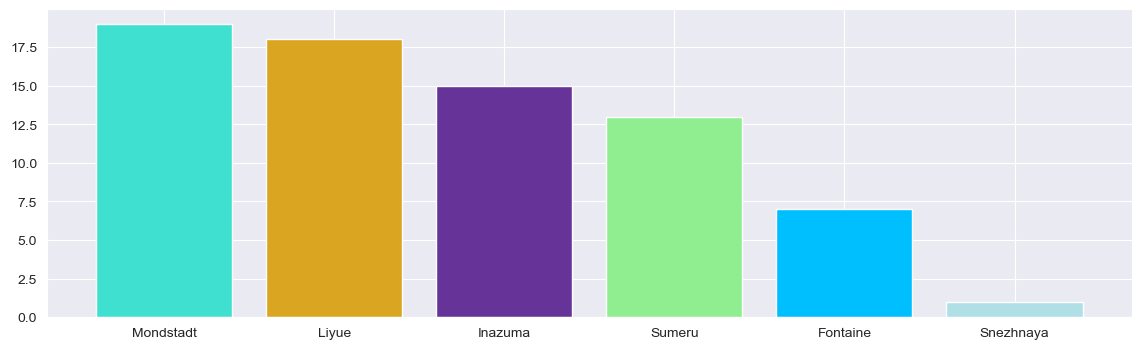

In [13]:
plt_data = data['region'].value_counts().reset_index()

plt.figure(figsize=(14, 4))
plt.bar(plt_data['region'],
        plt_data['count'],
        color=['turquoise', 'goldenrod', 'rebeccapurple', 'lightgreen', 'deepskyblue', 'powderblue']
        )

plt.show()

Distribution between regions looks like a sequence of regions released in the game. Mondstadt and Liyue are from the release, so there are more characters. For now (winter 2024), there are only five regions. Snezhnaya was not released, but we can find out that Tartaglia came from there.

# II. Strength and Damage. How do character features relate to vision?

This part of research is used to find the relations between vision type and stats of characters. Most of all, we pay attention to ATK and HP. DEF is also factored into the analysis. Other indicators such as Energy research, Crit Rate and Crit Damage do not appear in the analysis, because usually these are characteristics that depend directly on the character's role in the game.

## A. How are the statistics distributed among the characters?
I am drawing scatter plot. It helps to see how it differs ATK, HP and DEF by characters and their elements. Also, such a plot helps to estimate the characters with anomalies in stats.

In [14]:
plt_data = data[['region', 'character_name', 'vision', 'hp_90_90', 'atk_90_90', 'def_90_90']]
legend_labels = plt_data['vision'].unique().tolist()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=vision_color(v), markersize=10, label=v)
                  for v in legend_labels]

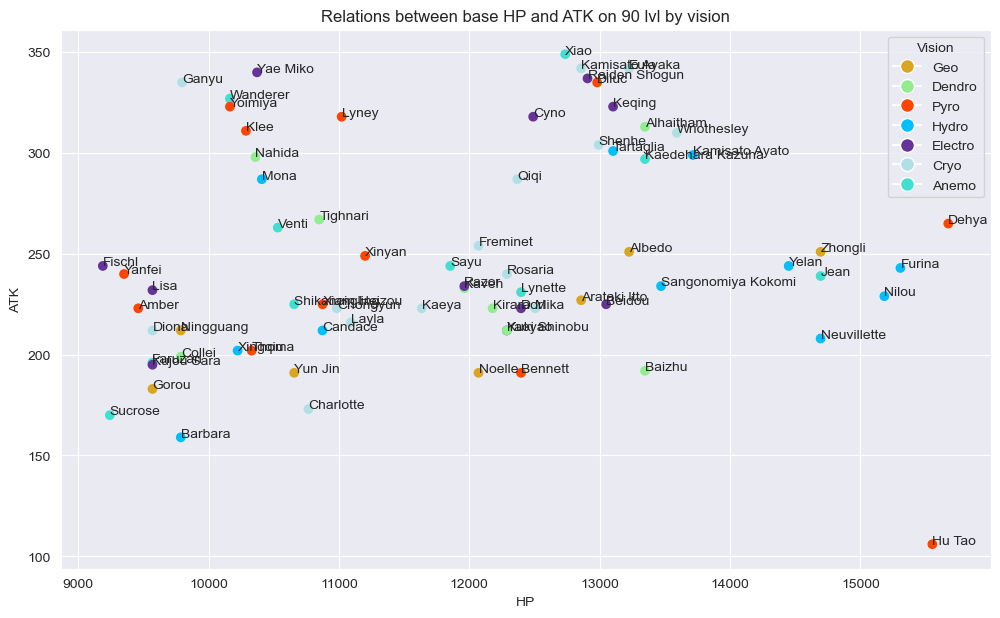

In [15]:
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    x=plt_data['hp_90_90'],
    y=plt_data['atk_90_90'],
    color=[vision_color(plt_data.loc[i, 'vision']) for i in range(len(plt_data))],
)

for i in range(len(plt_data['character_name'].tolist())):
    plt.annotate(
        plt_data.loc[i, 'character_name'],
        (plt_data.loc[i, 'hp_90_90'], plt_data.loc[i, 'atk_90_90'] + 0.2)
    )

plt.xlabel('HP')
plt.ylabel('ATK')

plt.legend(handles=legend_handles, labels=legend_labels, title='Vision')
plt.title('Relations between base HP and ATK on 90 lvl by vision')
plt.show()


We start the analysis of stats from estimating the value of HP and ATK for each character. Firstly, from the plot we get some anomalies. For example, Hu Tao has a huge HP stat, but her ATK is the smallest among all characters. Secondly, Barbara has the smallest both HP and ATK. Thirdly, as the opposite of Hu Tao, Gan Yu on the other hand has one of the highest ATK, but low HP. All of these cases particularly stand out from the sample. To be more specific, I categorize the characters.

Top of the HP max:
* Dehya
* Hu Tao
* Furina
* Nilou

Top of the HP min:
* Fischl
* Sucrose
* Yanfei

Top of the ATK max:
* Xiao
* Kamisato Ayaka
* Eula
* Yae Miko

Top of the ATK min:
* Hu Tao
* Barbara
* Sucrose
* Charlotte

As for the vision specifically, based on this plot, I can only suggest a hypothesis. For example, Hydro characters most often have more HP by default than others. However, I plan to refute it or confirm it in the following paragraphs of the study.

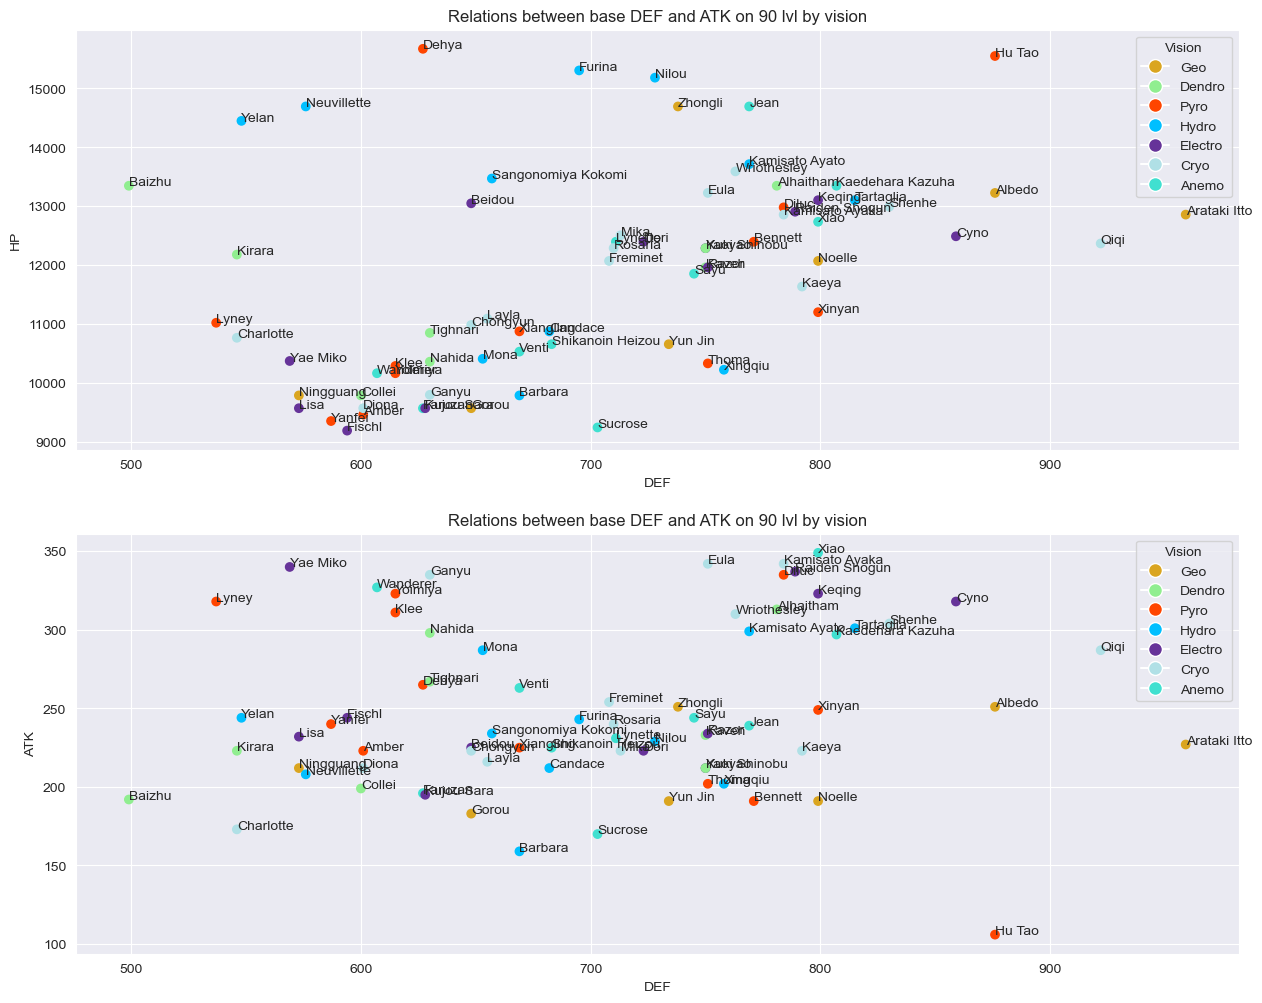

In [16]:
plt.figure(figsize=(15, 12))

# Plot DEF and HP
plt.subplot(211)
scatter = plt.scatter(
    x=plt_data['def_90_90'],
    y=plt_data['hp_90_90'],
    color=[vision_color(plt_data.loc[i, 'vision']) for i in range(len(plt_data))],
)

for i in range(len(plt_data['character_name'].tolist())):
    plt.annotate(
        plt_data.loc[i, 'character_name'],
        (plt_data.loc[i, 'def_90_90'], plt_data.loc[i, 'hp_90_90'] + 0.2),
    )

plt.xlabel('DEF')
plt.ylabel('HP')
plt.legend(handles=legend_handles, labels=legend_labels, title='Vision')
plt.title('Relations between base DEF and ATK on 90 lvl by vision')

# Plot DEF and ATK
plt.subplot(212)
scatter = plt.scatter(
    x=plt_data['def_90_90'],
    y=plt_data['atk_90_90'],
    color=[vision_color(plt_data.loc[i, 'vision']) for i in range(len(plt_data))],
)

for i in range(len(plt_data['character_name'].tolist())):
    plt.annotate(
        plt_data.loc[i, 'character_name'],
        (plt_data.loc[i, 'def_90_90'], plt_data.loc[i, 'atk_90_90'] + 0.2)
    )

plt.xlabel('DEF')
plt.ylabel('ATK')
plt.legend(handles=legend_handles, labels=legend_labels, title='Vision')
plt.title('Relations between base DEF and ATK on 90 lvl by vision')

plt.show()

These plots already explore the relationship with DEF. There are some anomalies, too. Notice that Arataki Itto's DEF stat is much different. Nevertheless, his ATK and HP are quite average in the sample. Albedo also relates to this conclusion. By the way, as in the previous part, I also make some top for these graphs.

Top of the DEF max:
* Arataki Itto
* Quqi
* Albedo
* Hu Tao
* Cyno

Top of the DEF min:
* Baizhu
* Charlotte
* Kirara
* Yelan



## B. How do the elements affect the statistics?
To answer this question, I use boxplot. They could help to see the general statistics. Previous conclusions give me some information related to individual characters. However, I want to know if they are exceptions in their own vision types or not?

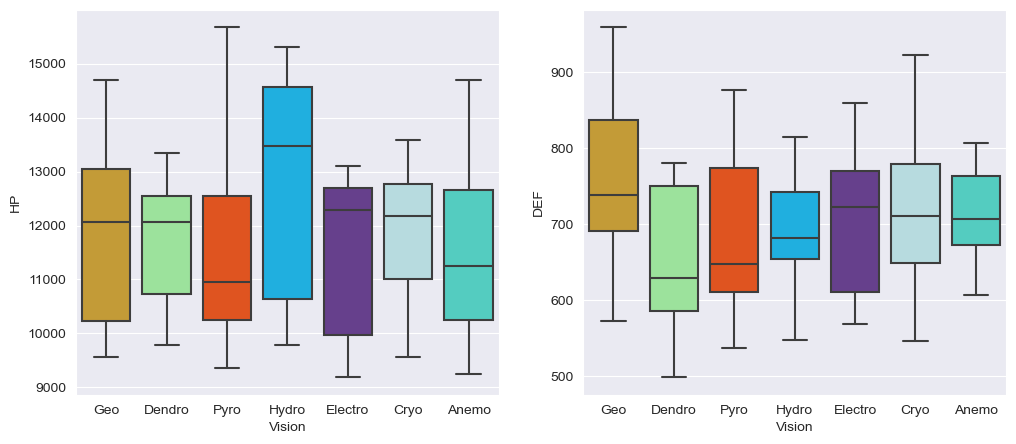

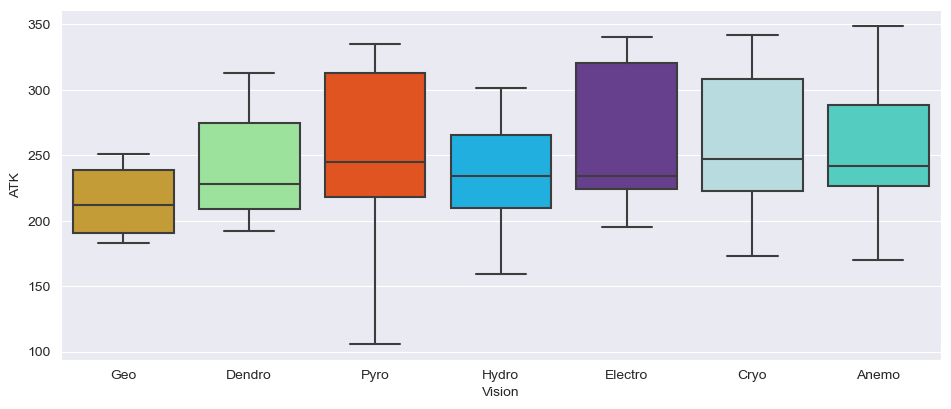

In [17]:
plt_data = data[['vision', 'atk_90_90', 'def_90_90', 'hp_90_90']].reset_index()

fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.boxplot(
    x='vision',
    y='hp_90_90',
    data=plt_data,
    palette=element,
    whis=1.5,
)
plt.xlabel('Vision')
plt.ylabel('HP')

plt.subplot(122)
sns.boxplot(
    x='vision',
    y='def_90_90',
    data=plt_data,
    palette=element,
    whis=1.5,
)
plt.xlabel('Vision')
plt.ylabel('DEF')

fig1 = plt.figure(figsize=(25, 10))
plt.subplot(221)
sns.boxplot(
    x='vision',
    y='atk_90_90',
    data=plt_data,
    palette=element,
    whis=1.5,
)
plt.xlabel('Vision')
plt.ylabel('ATK')

plt.show()

Some boxes are immediately noticeable. We can prove the previous hypothesis that Hydro characters have a high level of HP. According to the plot, it is true. The median value of Hydro vision HP is much larger that for other elements. Meanwhile, Pyro vision has the lowest median value of HP. Anemo characters don't have a lot of HP to offer either.

As for DEF, Geo element has the highest number of this. On average, each Geo character has more DEF than a character of another element. On the other hand, Dendro element has the lowest number of DEF. Its median is the smallest of all elements. For the other vision types, they all have almost the same median value of DEF.

Speaking of ATK, this is where the Pyro and Cryo elements stand out. Its median value is higher than of another element. As for Electro, it has a good level of ATK, but the median value is quite small. It means that typically Electro characters are not characterized by high ATK 

## C. Correlation Matrix
To analyze linear relation between rarity of the character, his ATK, HP, and DEF, I want to plot correlation matrix for more relevant analysis.

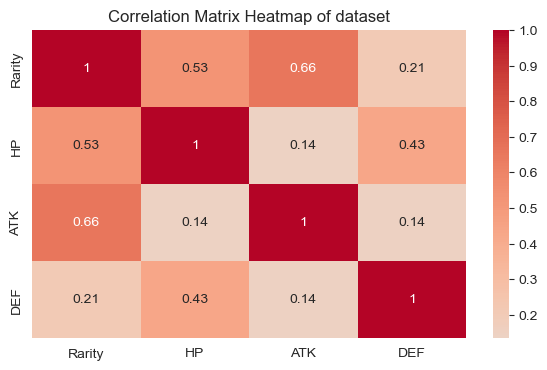

In [18]:
plt_data = data.select_dtypes('int64')
plt_data = plt_data.rename(columns={
    'rarity': 'Rarity',
    'hp_90_90': 'HP',
    'atk_90_90': 'ATK',
    'def_90_90': 'DEF',
})
corr = plt_data.corr()

plt.figure(figsize=(7, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap of dataset')
plt.show()

Based on the matrix, we can see a relatively average correlation between ATK and character rarity. The same relationship exists between HP and DEF. For other cases, the correlation coefficients are quite small to make any conclusions.

#  III. The financial part of the genshin impact
In the last part of work, I would like to review the main source of revenue in the game. The character banners make the company a huge amount of money every update. So, it is important to consider their statistics.

Remark! Data have only information till 3.2 update (inclusive). For now, there is 4.4 update.

## Data preview

In [19]:
data_by_banner = pd.read_csv('data/Genshin charac rev (by banner).csv')

In [20]:
data_by_banner.head()

,version,version_name,start_date,end_date,5_star_characters,rerun,mixed,revenue,banner_days,avg_revenue
0,1.0,Welcome to Tevyat,25/09/2020,19/10/2020,Venti,N,N,"30,632,752",25,"1,225,310.08"
1,1.0,Welcome to Tevyat,20/10/2020,10/11/2020,Klee,N,N,"22,750,080",22,"1,034,094.55"
2,1.1,A New Star Approaches,11/11/2020,30/11/2020,Tartaglia,N,N,"13,443,619",20,"672,180.95"
3,1.1,A New Star Approaches,01/12/2020,22/12/2020,Zhongli,N,N,"16,264,892",22,"739,313.27"
4,1.2,The Chalk Prince and the Dragon,23/12/2020,12/01/2021,Albedo,N,N,"11,816,107",21,"562,671.76"


In [21]:
data_by_banner.shape

(38, 10)

In [22]:
data_by_banner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   version            38 non-null     float64
 1   version_name       38 non-null     object 
 2   start_date         38 non-null     object 
 3   end_date           38 non-null     object 
 4   5_star_characters  38 non-null     object 
 5   rerun              38 non-null     object 
 6   mixed              38 non-null     object 
 7   revenue            38 non-null     object 
 8   banner_days        38 non-null     int64  
 9   avg_revenue        38 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.1+ KB


I notice that all useful numerical features have an object type. So, I need to fix it.

In [23]:
t = data_by_banner['revenue'].unique().tolist()

for i in range(len(t)):
    t[i] = int(t[i].replace(',', ''))

data_by_banner['revenue'] = t

In [24]:
t = data_by_banner['avg_revenue'].unique().tolist()

for i in range(len(t)):
    t[i] = float(t[i].replace(',', ''))

data_by_banner['avg_revenue'] = t

## How did the revenue change?

In [25]:
# Function to show millions for y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

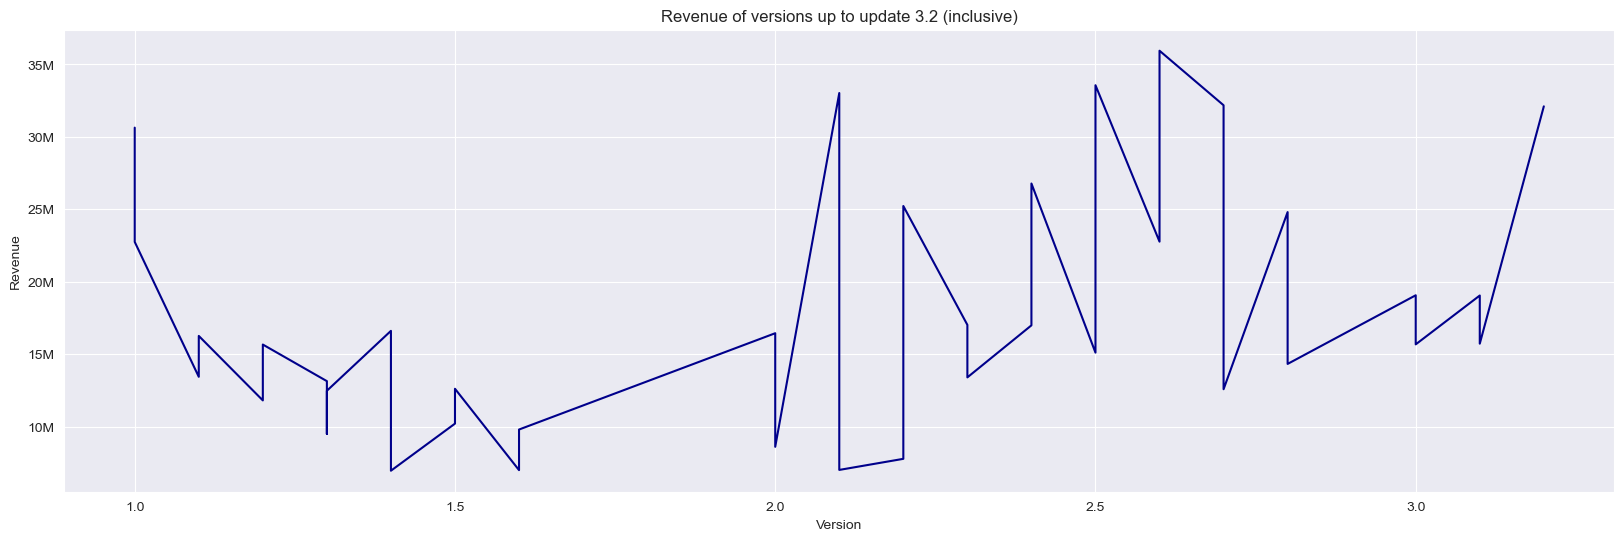

In [26]:
plt_data = data_by_banner[['version', 'revenue']]

plt.figure(figsize=(20, 6))
plt.plot(plt_data['version'], plt_data['revenue'], color='darkblue')
x_values = data_by_banner['version'].unique().tolist()

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.xlabel('Version')
plt.ylabel('Revenue')
plt.title('Revenue of versions up to update 3.2 (inclusive)')

plt.show()

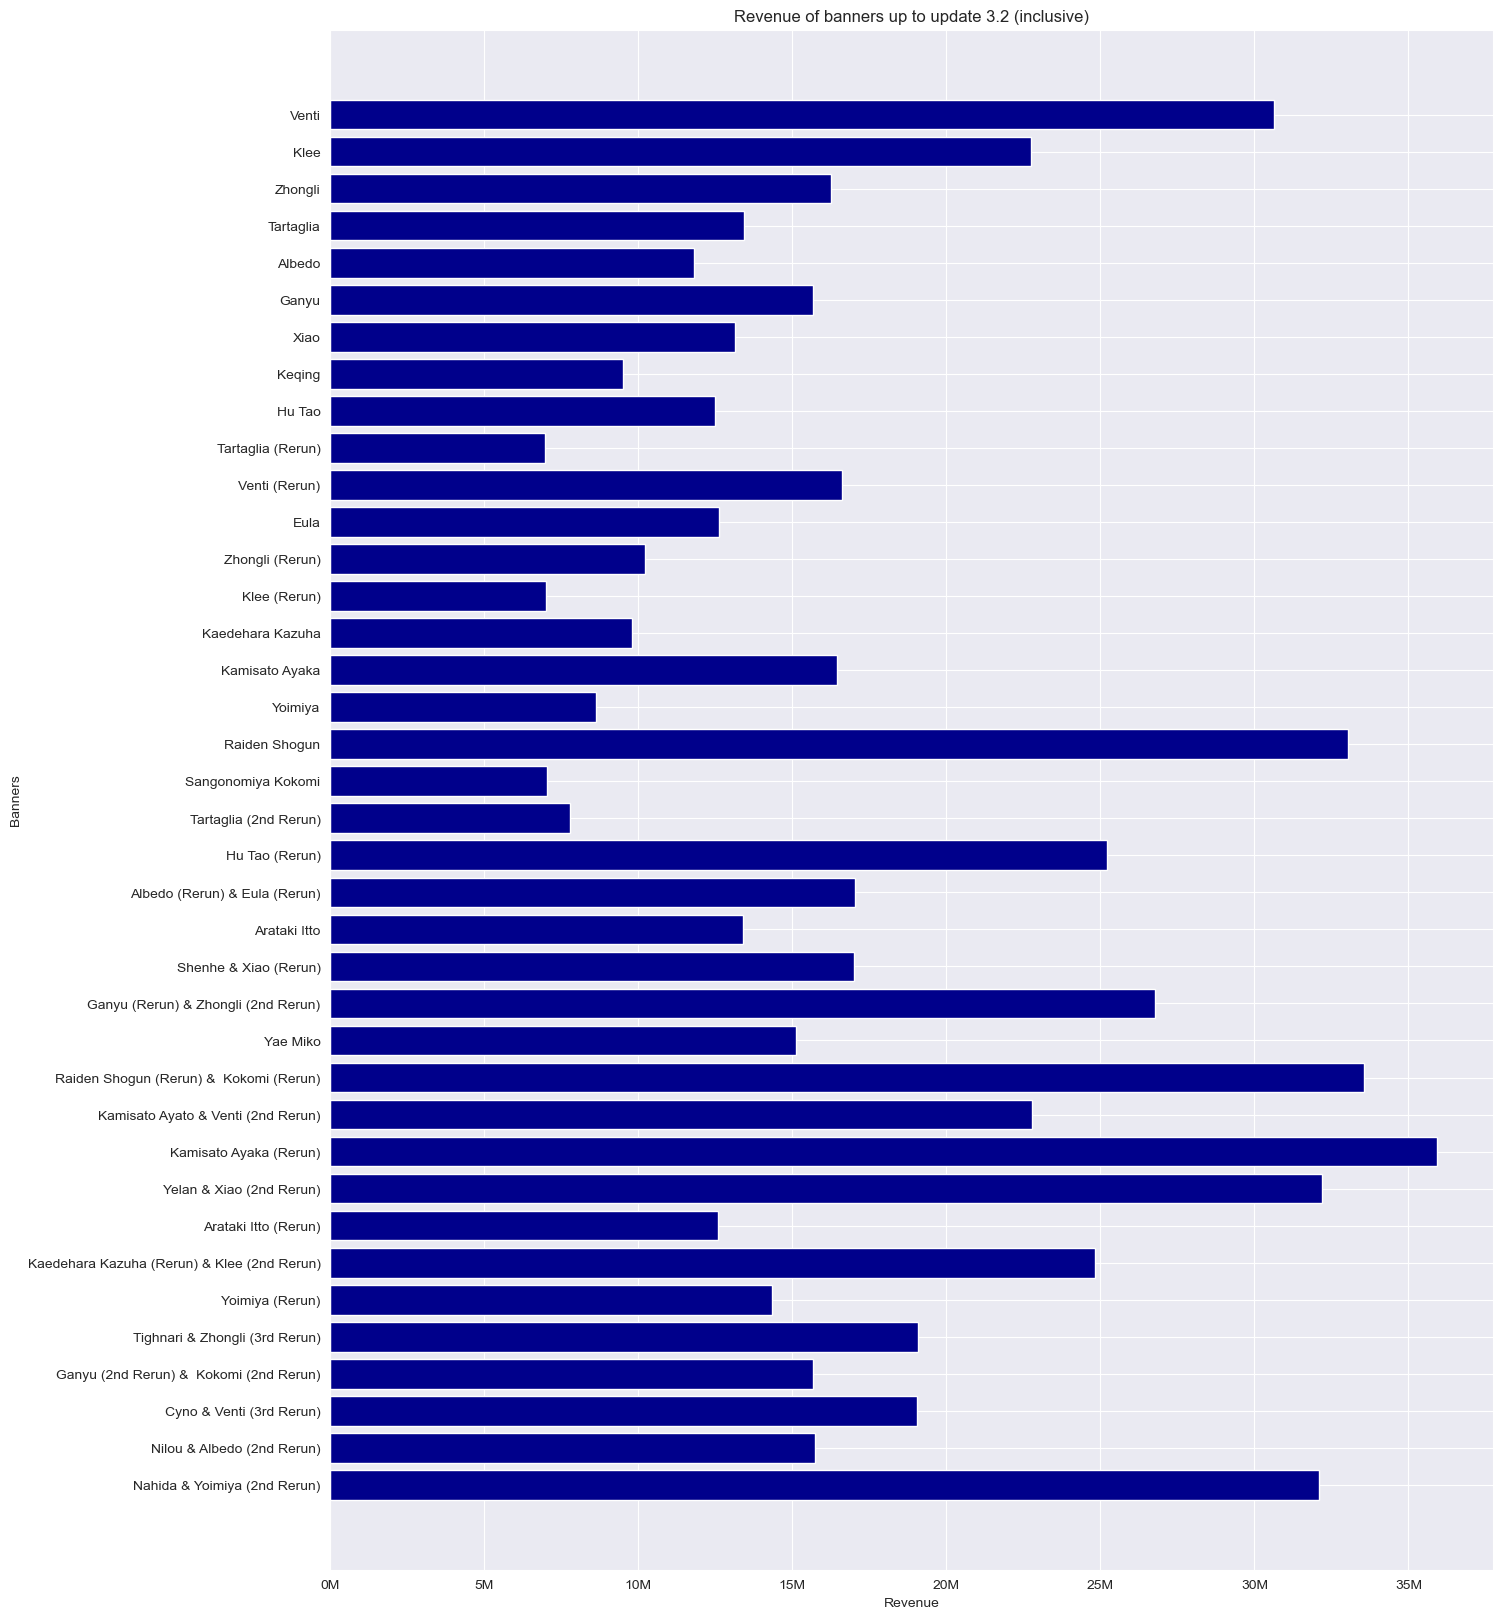

In [27]:
plt_data = data_by_banner[['revenue', '5_star_characters', 'version']].sort_values(by='version',
                                                                                   ascending=False,
                                                                                   )

plt.figure(figsize=(15, 20))
plt.barh(plt_data['5_star_characters'], plt_data['revenue'], color='darkblue')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.ylabel('Banners')
plt.xlabel('Revenue')
plt.title('Revenue of banners up to update 3.2 (inclusive)')
plt.show()

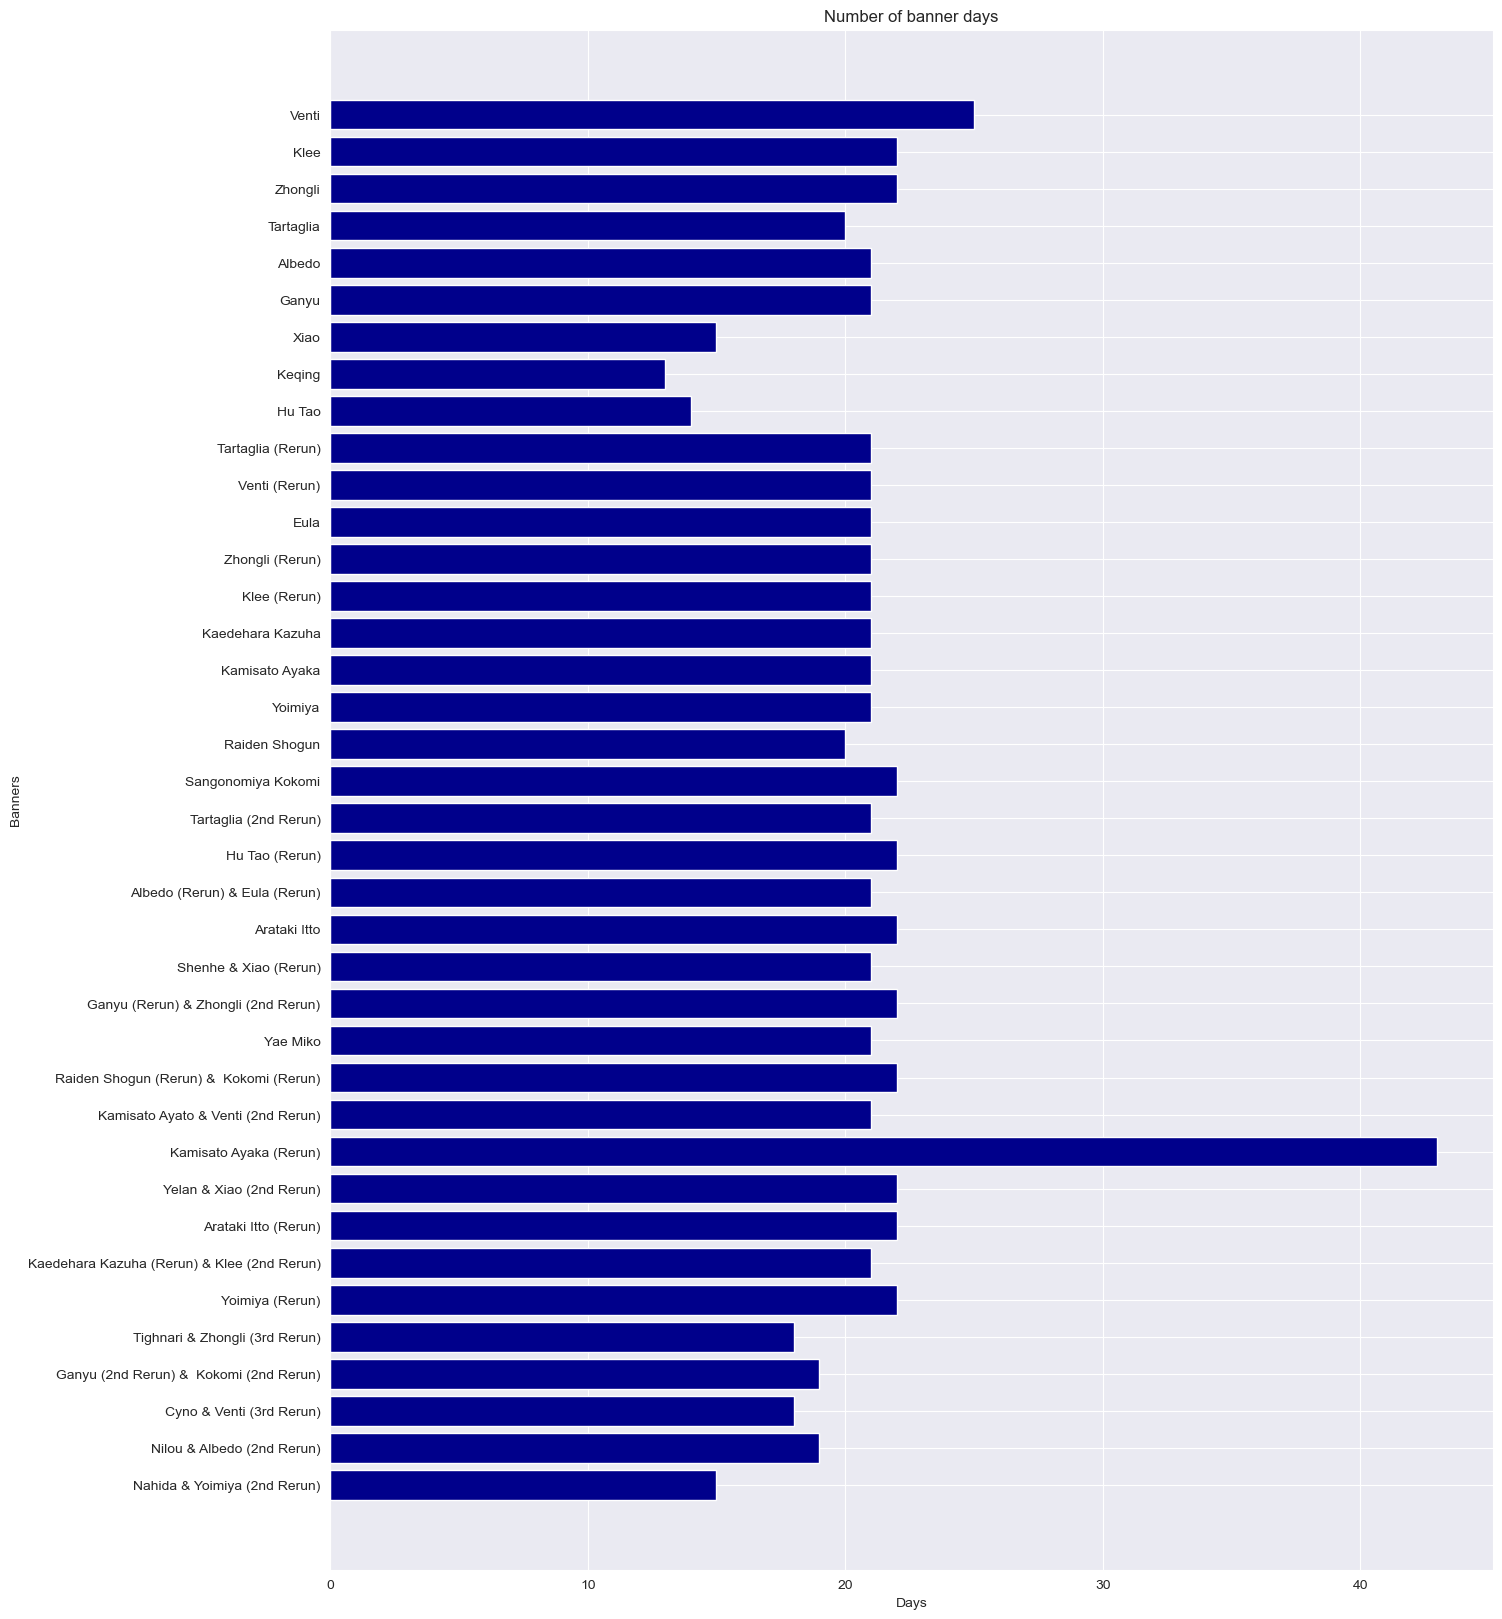

In [28]:
plt_data = data_by_banner[['revenue', '5_star_characters', 'banner_days', 'version']].sort_values(by='version',
                                                                                                  ascending=False,
                                                                                                  )

plt.figure(figsize=(15, 20))
plt.barh(plt_data['5_star_characters'], plt_data['banner_days'], color='darkblue')
plt.ylabel('Banners')
plt.xlabel('Days')
plt.title('Number of banner days')
plt.show()

Using the first plot, we see that the level of revenue is not stable. For some updates, it is tiny. From version 2.4, the profits are getting bigger, but it is still volatile. 

Using the second plot, we can already see that the profits are not uniform because of the characters that are released in different updates. The first and second graphs are correlated. Also, sometimes whether it is rerun or not makes any difference to revenue. Hence, Hoyoverse get money only on characters that people like. It is not related with specific season. Only related with the character released in some version or not.

The only exception to my conclusion is Kamisato Ayaka's rerun banner. While all banners last an average of 21 days each, Ayaka's banner was over 40 days. That is why it made the most money.

# Conclusion

After all the research, the major information of Teyvat characters is clearly now. We analyze relations between characters, their types of weapons and visions. Also, we make some conclusions related with ATK, HP and DEF stats.

To summarize, we can say that Genshin Impact is a very structured game in which the developer thinks through every detail. As a fan, I can notice that each stat is related to the role of character in the game. For example, usually all Geo characters buff themselves with DEF. So, the developer gave Geo characters with more DEF than others. This works with Hydro element, too. 

Also, we found out that the female characters in the game are much more than male. It is because men are the primary players of the game. Hence, it's much more profitable for Hoyoverse to produce female characters it can sell.

For now, The game's culmination awaits players for some time to come. There are at least three regions ahead of the players: Natlan, Snezhnaya and Khaenri'ah. Due to a good strategy, this game will be relevant for a long time. So, this means that no matter what crises the game is going through, it will still live.